In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IMDB.csv')

data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords (run once)
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    text = re.sub(r'[^\d+]', '', text)
    
    tockens = word_tokenize(text)
    
    tockens = [word for word in tockens if word not in stopwords.words('english')]
    
    return ''.join(tockens)

    # Apply the cleaning function to the dataset
data['cleaned_review'] = data['review'].apply(clean_text)

# Display the cleaned text
print(data['cleaned_review'].head())

    

0      1
1       
2      2
3    310
4       
Name: cleaned_review, dtype: object


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 5000)

X = vectorizer.fit_transform(data['cleaned_review']).toarray()

y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy: ', accuracy_score(y_test, y_pred))

print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy:  0.5231
Confusion Matrix:  [[3983  978]
 [3791 1248]]
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.80      0.63      4961
           1       0.56      0.25      0.34      5039

    accuracy                           0.52     10000
   macro avg       0.54      0.53      0.48     10000
weighted avg       0.54      0.52      0.48     10000



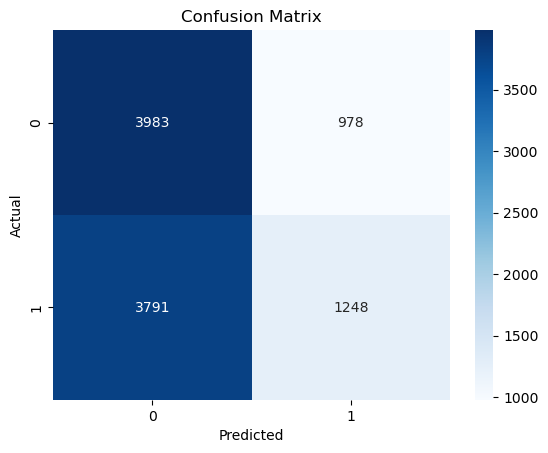

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()